# Education2

# Was Industrial Revolution driven by technical ability of a minority?

## Data Description

Panel dataset of 193 French cities of whole 19 century, capturing :

-   City-level subscriptions to the famous encyclopédie in mid-18th
    century by population
-   City population in france as a proxy for development
-   Literacy rate
-   Geographic characteristics
-   University access before 1750
-   Printing press
-   Cultural and language differences

## Empirical Model

### OLS model:

$$
\Large   y_n = \beta S_n + \gamma h_n + \delta X_n + \varepsilon\_n \
$$

-   **y_n** - city population as a proxy for economic development  
-   **S_n** - knowledge elites in location ( n ) (with subscriber
    density as a baseline measure)  
-   **h_n** - average human capital, such as literacy and schooling  
-   **X_n** - a vector of control variables  
-   \*\*\_n\*\* - error term

**Expectation:** ( = 0 ) and ( \> 0 )

## Empirical Results

Prepare our Environment

In [ ]:
rm(list=ls())

#Install and load all required libraries
  #install.packages("htmlreg")
  #install.packages("textreg")
  #install.packages("AER")
  # install.packages("ivreg")
  # install.packages("foreign")
  # install.packages("haven")
  # install.packages("magrittr")
  # install.packages("htmltools")
  library(haven)
  library(foreign)
  library(AER)
  library(texreg)
  library(stargazer)
  library(lmtest)
  library(sandwich)
  library(magrittr)
  library(htmltools)
  library(ivreg)
  library(car)

## Open the data source

In [ ]:
#Open the data source
   Data_CityLevel <- read_dta("C:\\Users\\Olga\\Desktop\\Обучение\\01. Thesis\\0. my R projects\\1. Seminar Econometrics\\1. Second article\\HumanCapInd_QJE_Replicate (1)\\Data_CityLevel_ReplicationQJE.dta")
  Data_FirmLevel <- read_dta("C:\\Users\\Olga\\Desktop\\Обучение\\01. Thesis\\0. my R projects\\1. Seminar Econometrics\\1. Second article\\HumanCapInd_QJE_Replicate (1)\\Data_FirmLevel_ReplicationQJE.dta")

## Define variables

``` r
#define variables
  #City Growth
  growth_1750_1850 = log(Data_CityLevel$pop_1850/Data_CityLevel$pop_1750)
  
  # Log City Population
  lnpop1750 <- log(Data_CityLevel$pop_1750)
  lnpop1700 <- log(Data_CityLevel$pop_1700)
  
  # Confounding factors
  ln_num_edit <- log(1 + Data_CityLevel$num_edit)
  ln_stn_total_pc <- log(1 + Data_CityLevel$stn_total / Data_CityLevel$pop_1750)
  
  #Subscriptions
  lnsub_pc = log(1+Data_CityLevel$subs/Data_CityLevel$pop_1750)
  
  #Geographic characteristic: Cities and departments dummies
  Paris= ifelse(Data_CityLevel$city_id == 873, 1, 0)
  Dept_nonFrench = ifelse(Data_CityLevel$department_id %in% c(66, 67, 28, 19, 65, 63), 1, 0)
```

## Graph 1

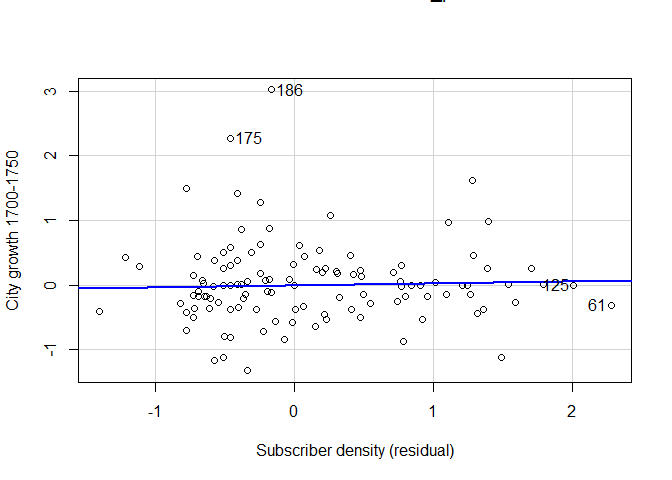


Call:
lm(formula = growth_1750_1850b ~ lnsub_pc + lnpop1750 + atlanticport + 
    medport + navigable_river + uni_dummy + Paris + Dept_nonFrench + 
    print_cities + ln_num_edit, data = Data_CityLevel, subset = growth_1750_1850b_outlier != 
    1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.18141 -0.14329  0.00122  0.21732  1.20863 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.527377   0.096275   5.478 1.44e-07 ***
lnsub_pc         0.185627   0.037495   4.951 1.70e-06 ***
lnpop1750       -0.160346   0.047964  -3.343 0.001009 ** 
atlanticport     0.331677   0.120334   2.756 0.006451 ** 
medport          0.731636   0.161095   4.542 1.02e-05 ***
navigable_river  0.121220   0.110439   1.098 0.273846    
uni_dummy       -0.116958   0.110389  -1.060 0.290794    
Paris            0.750151   0.456241   1.644 0.101890    
Dept_nonFrench   0.395693   0.111469   3.550 0.000493 ***
print_cities     0.167087   0.127135   1.314 0.1904

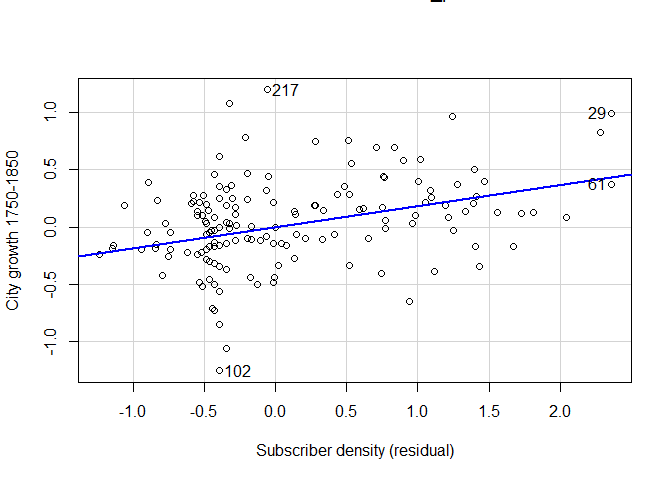

In [ ]:
  # Calculating the annual growth rate for the population from 1700 to 1750
  growth_1700_1750b <- ((Data_CityLevel$pop_1750 / Data_CityLevel$pop_1700)^(1/50) - 1) * 100
  # Identifying outliers for this growth rate, marking cities with growth rates less than or equal to -1% as outliers
  growth_1700_1750b_outlier <- ifelse(growth_1700_1750b <= -1, 1, 0)
  # Running regression for the growth rate from 1700-1750, excluding identified outliers
  model1700 <- lm(growth_1700_1750b ~ lnsub_pc + lnpop1700 + atlanticport + medport + navigable_river + uni_dummy + Paris + Dept_nonFrench + print_cities + ln_num_edit, 
                  data = Data_CityLevel, subset = growth_1700_1750b_outlier != 1)
  # Creating an added variable plot for the regression of growth from 1700-1750 against the subscriber density (residual)
  avPlots(model1700,"lnsub_pc",  plot = TRUE, ylab = "City growth 1700-1750", 
          xlab = "Subscriber density (residual)" )

## Table 1. Correlations with subscriber density (lnSubDens)

``` r
  # Model 1.1: Linear regression predicting subscriber density using city population in 1750 and a dummy for Paris
  model1_1 <- lm(lnsub_pc ~ lnpop1750+ Paris, data = Data_CityLevel)
  # Model 1.2: Predicting subscriber density using a dummy for cities with Atlantic ports and a dummy for Paris
  model1_2 <- lm(lnsub_pc ~ atlanticport+ Paris, data = Data_CityLevel)
  # Model 1.3: Predicting subscriber density using a dummy for cities with Mediterranean ports and a dummy for Paris
  model1_3 <- lm(lnsub_pc ~ medport+ Paris, data = Data_CityLevel)
  # Model 1.4: Predicting subscriber density using a dummy for cities located on a navigable river and a dummy for Paris
  model1_4 <- lm(lnsub_pc ~ navigable_river+ Paris, data = Data_CityLevel)
  # Model 1.5: Predicting subscriber density using a dummy for cities in non-French speaking departments and a dummy for Paris
  model1_5 <- lm(lnsub_pc ~ Dept_nonFrench+ Paris, data = Data_CityLevel)
  # Model 1.6: Predicting subscriber density using a dummy for cities that hosted a university before 1750 and a dummy for Paris
  model1_6 <- lm(lnsub_pc ~ uni_dummy+ Paris, data = Data_CityLevel)
  # Model 1.7: Predicting subscriber density using a dummy for cities where a printing press was established before 1500 and a dummy for Paris
  model1_7 <- lm(lnsub_pc ~ print_cities+ Paris, data = Data_CityLevel)
  # Model 1.8: Predicting subscriber density using the log number of editions printed before 1501 and a dummy for Paris
  model1_8 <- lm(lnsub_pc ~ ln_num_edit + Paris, data = Data_CityLevel)
  # Model 3.1: Linear regression predicting subscriber density using book purchases per capita from the Swiss publishing house
  model3_1 <- lm(lnsub_pc ~ ln_stn_total_pc, data = Data_CityLevel)
  # # Compile the regression models into a list
  model_list_cor <- list(model1_1, model1_2,model1_3,model1_4,model1_5,model1_6,model1_7,model1_8,model3_1)
  # Setting custom names for the model coefficients for clearer interpretation in the output
  custom_names3 <- c("(Intercept)"="Intercept",
                    "lnpop1750" = "ln(Pop 1750)",
                    "atlanticport"="Atlantic Port",
                    "medport"="Mediterranean Port",
                    "navigable_river"="Navigable River",
                    "Dept_nonFrench"= "Non French Speaking",
                    "uni_dummy"= "University",
                    "print_cities"="Printing Press",
                    "ln_num_edit"= "ln(Books Printed 1500)",
                    "ln_stn_total_pc"= "lnSTNBooksDens" )
  # Displaying the regression results in an HTML format 
  htmlreg(l = model_list_cor, 
          digits = 3, 
          custom.coef.names = custom_names3, 
          single.row = TRUE,
          omit.coef="Paris")  %>% HTML() %>% browsable()
```

|                                                                               | Model 1                        | Model 2                        | Model 3                        | Model 4                        | Model 5                        | Model 6                        | Model 7                        | Model 8                        | Model 9                        |
|-------------------------------------------------------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|
| Intercept                                                                     | -0.214 (0.166)                 | 0.579 (0.062)<sup>\*\*\*</sup> | 0.584 (0.061)<sup>\*\*\*</sup> | 0.549 (0.062)<sup>\*\*\*</sup> | 0.612 (0.062)<sup>\*\*\*</sup> | 0.472 (0.059)<sup>\*\*\*</sup> | 0.458 (0.062)<sup>\*\*\*</sup> | 0.510 (0.062)<sup>\*\*\*</sup> | 0.357 (0.059)<sup>\*\*\*</sup> |
| ln(Pop 1750)                                                                  | 0.374 (0.073)<sup>\*\*\*</sup> |                                |                                |                                |                                |                                |                                |                                |                                |
| Atlantic Port                                                                 |                                | 0.081 (0.248)                  |                                |                                |                                |                                |                                |                                |                                |
| Mediterranean Port                                                            |                                |                                | 0.022 (0.345)                  |                                |                                |                                |                                |                                |                                |
| Navigable River                                                               |                                |                                |                                | 0.422 (0.215)                  |                                |                                |                                |                                |                                |
| Non French Speaking                                                           |                                |                                |                                |                                | -0.376 (0.229)                 |                                |                                |                                |                                |
| University                                                                    |                                |                                |                                |                                |                                | 1.030 (0.177)<sup>\*\*\*</sup> |                                |                                |                                |
| Printing Press                                                                |                                |                                |                                |                                |                                |                                | 0.712 (0.149)<sup>\*\*\*</sup> |                                |                                |
| ln(Books Printed 1500)                                                        |                                |                                |                                |                                |                                |                                |                                | 0.171 (0.049)<sup>\*\*\*</sup> |                                |
| lnSTNBooksDens                                                                |                                |                                |                                |                                |                                |                                |                                |                                | 0.242 (0.030)<sup>\*\*\*</sup> |
| R<sup>2</sup>                                                                 | 0.120                          | 0.001                          | 0.000                          | 0.020                          | 0.014                          | 0.151                          | 0.108                          | 0.061                          | 0.251                          |
| Adj. R<sup>2</sup>                                                            | 0.111                          | -0.010                         | -0.010                         | 0.010                          | 0.004                          | 0.142                          | 0.099                          | 0.051                          | 0.247                          |
| Num. obs.                                                                     | 193                            | 193                            | 193                            | 193                            | 193                            | 193                            | 193                            | 193                            | 193                            |
| <sup>\*\*\*</sup>p \< 0.001; <sup>\*\*</sup>p \< 0.01; <sup>\*</sup>p \< 0.05 |                                |                                |                                |                                |                                |                                |                                |                                |                                |

Statistical models

# Table 2. Literacy and additional controls

``` r
  # Model 1 - Linear regression model predicting growth_1750_1850 using various city-level characteristics
  model1 <- lm(growth_1750_1850 ~ lnsub_pc + literacy_males_1786 + lnpop1750+ atlanticport + medport + navigable_river + Paris + Dept_nonFrench + uni_dummy + print_cities + ln_num_edit , data = Data_CityLevel, weights = Data_CityLevel$pop_1750)
  # Model - 2 Similar to Model 1, but with the addition of a variable ln_stn_total_pc representing book purchases per capita
  model2 <- lm(growth_1750_1850 ~ lnsub_pc + literacy_males_1786 + ln_stn_total_pc + atlanticport + medport + navigable_river + Paris + Dept_nonFrench + uni_dummy + print_cities + ln_num_edit + lnpop1750, data = Data_CityLevel, weights = Data_CityLevel$pop_1750)
  
  #Define clustering variable as department_id 
  cluster_var <- (Data_CityLevel$department_id) 
  # Adjusting models for clustered standard errors at the department level 
  Model1_robust <- coeftest(model1, vcov = vcovCL(model1, cluster = cluster_var))
  Model2_robust <- coeftest(model2, vcov = vcovCL(model2, cluster = cluster_var))
  
  # Compiling the two models for easier comparison and output presentation
  model_list <- list(Model1_robust, Model2_robust)
  
  # Setting custom names for the model coefficients for clearer interpretation in the output
  custom_names <- c("(Intercept)"="Intercept",
                    "lnsub_pc" = "lnSubDens",
                    "literacy_males_1786" = "Literacy 1786",
                    "lnpop1750" = "ln(Pop 1750)",
                    "atlanticport"="Atlantic Port",
                    "medport"="Mediterranean Port",
                    "navigable_river"="Navigable River",
                    "Paris"="Paris",
                    "Dept_nonFrench"= "Non French Speaking",
                    "uni_dummy"= "University",
                    "print_cities"="Printing Press",
                    "ln_num_edit"= "ln(Books Printed 1500)",
                    "ln_stn_total_pc"= "lnSTNBooksDens"  )
  
  # Displaying the regression results in an HTML format 
  # Custom notes provide further context and explanations about the variables used
  htmlreg(l = model_list, digits = 3, custom.coef.names = custom_names, single.row = TRUE,
          custom.note="Population 1750 measures urban population (in thousands) for the cities in our sample. 
        Atlantic Port, Mediterranean Port and Navigable River are dummies for cities with ports on
        the Atlantic Ocean or on the Mediterranean Sea, or located on a navigable river. 
        Non French Speaking is a dummy for Cities in six French departments that spoke a language other than French in the 18th century. 
        University is a dummy for cities that hosted a University before 1750. 
        Printing Press is a dummy for cities where a printing press was established before 1500. 
        ln(Books Printed 1500) represents the log number of editions printed before 1501. Literacy in 1686 and
        1786 measures the percentage of men signing their wedding certificate in the respective year. 
        lnSTNBooksDens represents the (log) book purchases per capita from the Swiss publishing house Société Typographique de Neuchâtel (STN) over the
        period 1769-1794. Pays d’élection is a dummy for cities in regions where the French king exerted particularly strong
        control over tax collection. 
        lnPreIndDens is an index of pre-industrial activities in France that includes the number of
        mines, forges, iron trading locations, and textile manufactures before 1500. 
        lnDistanceCoal measures the log distance (in km) from the closest coal field mined in the 19th century. lnNoblesDens reflects the (log) number of noble families
        per capita in each French department.") %>% HTML() %>% browsable()
```

|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | Model 1                        | Model 2                        |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------|--------------------------------|
| Intercept                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  | 0.441 (0.113)<sup>\*\*\*</sup> | 0.379 (0.107)<sup>\*\*\*</sup> |
| lnSubDens                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  | 0.180 (0.040)<sup>\*\*\*</sup> | 0.198 (0.042)<sup>\*\*\*</sup> |
| Literacy 1786                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | -0.209 (0.142)                 | -0.156 (0.135)                 |
| ln(Pop 1750)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               | -0.075 (0.043)                 | -0.053 (0.041)                 |
| Atlantic Port                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | 0.285 (0.090)<sup>\*\*</sup>   | 0.269 (0.090)<sup>\*\*</sup>   |
| Mediterranean Port                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | 0.783 (0.099)<sup>\*\*\*</sup> | 0.792 (0.092)<sup>\*\*\*</sup> |
| Navigable River                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | 0.038 (0.071)                  | 0.034 (0.068)                  |
| Paris                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | 0.823 (0.230)<sup>\*\*\*</sup> | 0.752 (0.225)<sup>\*\*</sup>   |
| Non French Speaking                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | 0.120 (0.096)                  | 0.091 (0.093)                  |
| University                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | -0.126 (0.084)                 | -0.101 (0.088)                 |
| Printing Press                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | 0.135 (0.103)                  | 0.124 (0.105)                  |
| ln(Books Printed 1500)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | -0.018 (0.025)                 | -0.014 (0.025)                 |
| lnSTNBooksDens                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |                                | -0.025 (0.021)                 |
| Population 1750 measures urban population (in thousands) for the cities in our sample. Atlantic Port, Mediterranean Port and Navigable River are dummies for cities with ports on the Atlantic Ocean or on the Mediterranean Sea, or located on a navigable river. Non French Speaking is a dummy for Cities in six French departments that spoke a language other than French in the 18th century. University is a dummy for cities that hosted a University before 1750. Printing Press is a dummy for cities where a printing press was established before 1500. ln(Books Printed 1500) represents the log number of editions printed before 1501. Literacy in 1686 and 1786 measures the percentage of men signing their wedding certificate in the respective year. lnSTNBooksDens represents the (log) book purchases per capita from the Swiss publishing house Société Typographique de Neuchâtel (STN) over the period 1769-1794. Pays d’élection is a dummy for cities in regions where the French king exerted particularly strong control over tax collection. lnPreIndDens is an index of pre-industrial activities in France that includes the number of mines, forges, iron trading locations, and textile manufactures before 1500. lnDistanceCoal measures the log distance (in km) from the closest coal field mined in the 19th century. lnNoblesDens reflects the (log) number of noble families per capita in each French department. |                                |                                |

Statistical models

# `{r setup, error=FALSE, results = 'asis', warning=FALSE, message=FALSE} # quarto::quarto_render("Elites.qmd", output_format = "ipynb") #`